<a href="https://colab.research.google.com/github/nocturnal-deviant/nocturnal-deviant/blob/main/AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [2]:
# Load the data
df = pd.read_csv('/content/AML - Table 1.csv')
df.head()

,Date,Value Date,Particulars,Tran Type,Withdrawals,Deposits,Result
0,17-Jan-2021,17-Jan-2021,MB IMPS/IFO/101705844115\n/HDFC0002835/Unnikri...,MB,100.0,NaN,0
1,17-Jan-2021,17-Jan-2021,UPI IN/101789247640\n/9539599958@paytm/NA/0000,MB,NaN,150.0,0
2,17-Jan-2021,17-Jan-2021,MB IMPS/IFO/101705844149\n/HDFC0002835/Unnikri...,TFR,150.0,NaN,0
3,17-Jan-2021,17-Jan-2021,UPI IN/101789258050\n/9539599958@paytm/NA/0000,MB,NaN,150.0,0
4,17-Jan-2021,17-Jan-2021,MB IMPS/IFO/101705844138\n/HDFC0002835/Unnikri...,TFR,150.0,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2515 non-null   object 
 1   Value Date   2515 non-null   object 
 2   Particulars  2515 non-null   object 
 3   Tran Type    2513 non-null   object 
 4   Withdrawals  1470 non-null   float64
 5   Deposits     1045 non-null   float64
 6   Result       2515 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 137.7+ KB


In [4]:
df.shape

(2515, 7)

In [5]:
print(df.isna().sum())

Date              0
Value Date        0
Particulars       0
Tran Type         2
Withdrawals    1045
Deposits       1470
Result            0
dtype: int64


In [6]:
#  Drop irrelevant columns
df = df.drop(['Tran Type', 'Date', 'Value Date', 'Particulars'], axis=1)

In [7]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['Withdrawals', 'Deposits']] = imputer.fit_transform(df[['Withdrawals', 'Deposits']])

In [8]:
# Features (X) and target variable (y)
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

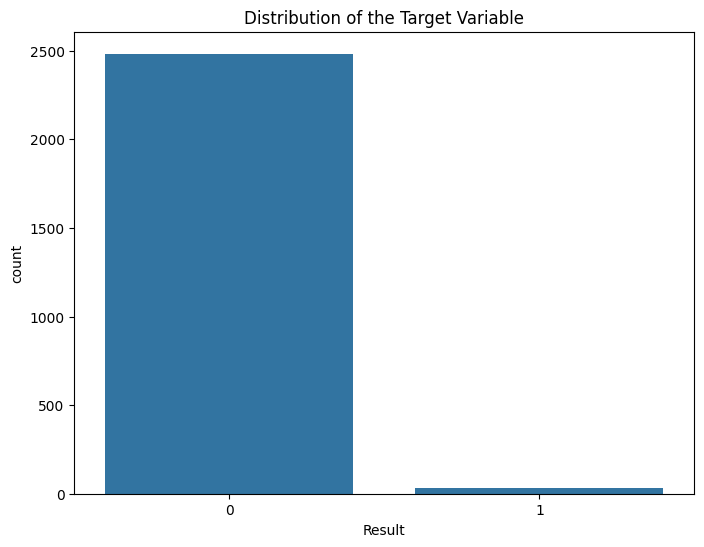

In [9]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of the Target Variable')
plt.show()


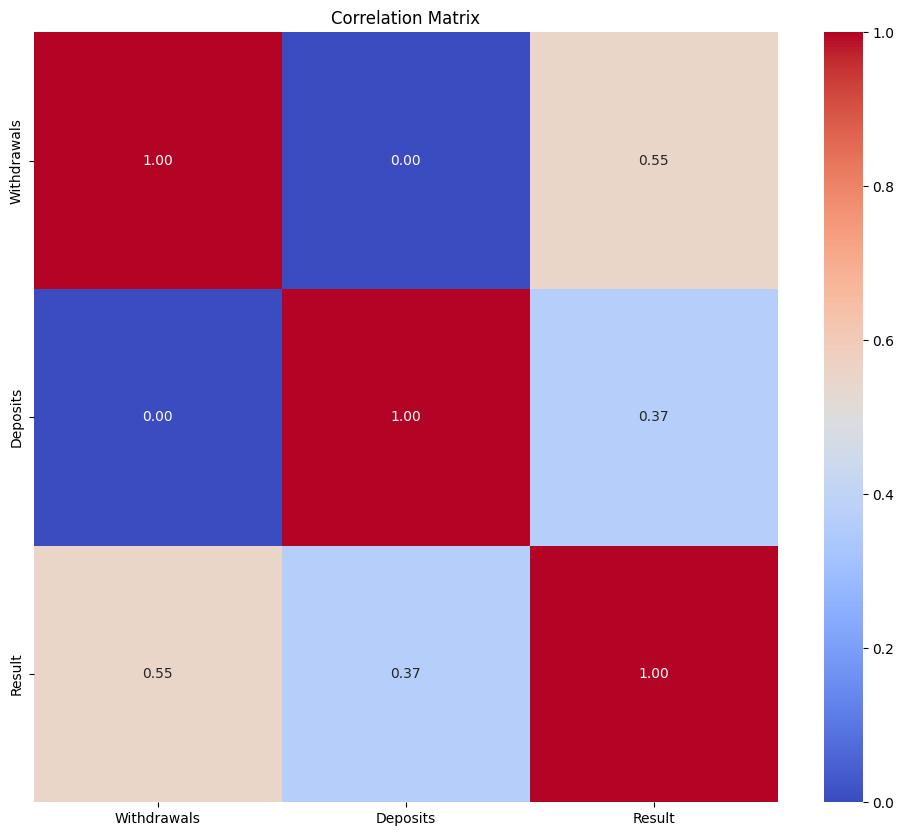

In [10]:
# Visualizing the correlation matrix of the features
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

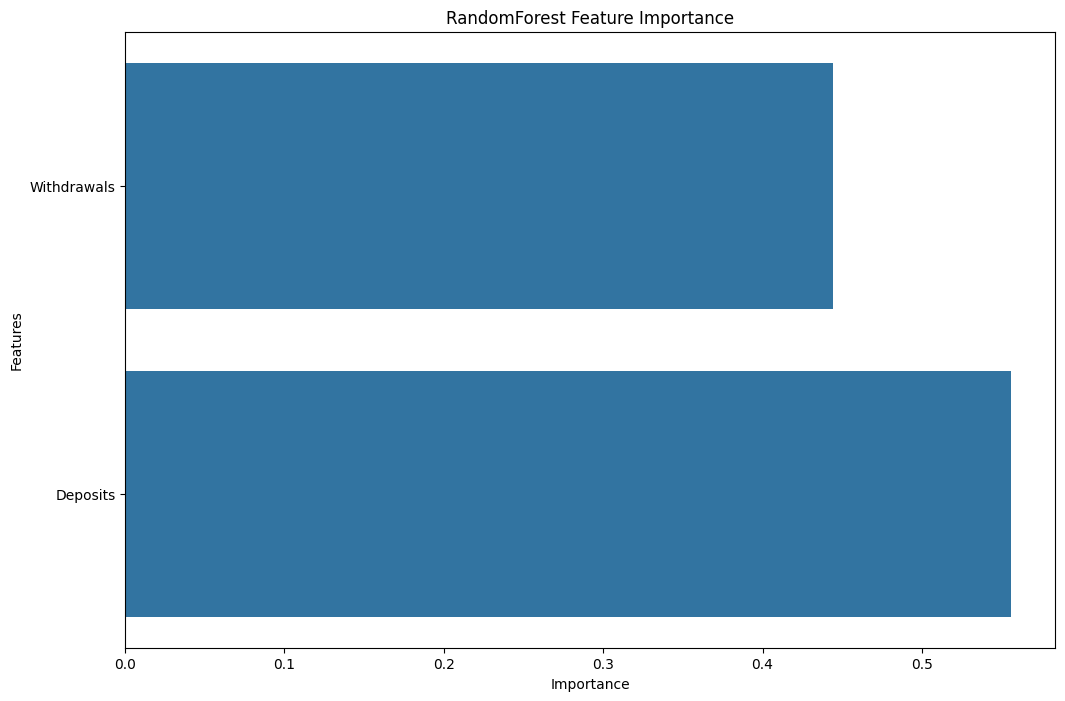

In [30]:
feature_importance = best_rf_classifier.feature_importances_
features = df.columns[:-1]

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=features)
plt.title('RandomForest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [11]:
# Feature selection using SelectKBest
k_best = SelectKBest(f_classif, k=min(10, len(df.columns)-1))
x = k_best.fit_transform(x, y)

In [12]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [13]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
# Hyperparameter tuning for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=3)
grid_search_svm.fit(x_train, y_train)
best_svm_classifier = grid_search_svm.best_estimator_

In [15]:
# Hyperparameter tuning for RandomForest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3)
grid_search_rf.fit(x_train, y_train)
best_rf_classifier = grid_search_rf.best_estimator_

In [16]:
# Hyperparameter tuning for Logistic Regression
param_grid_lr = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=3)
grid_search_lr.fit(x_train, y_train)
best_lr_classifier = grid_search_lr.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

In [17]:
# Evaluate SVM model
ypred_svm = best_svm_classifier.predict(x_test)
print("SVM - Best Parameters:", grid_search_svm.best_params_)
print(classification_report(y_test, ypred_svm))
print(confusion_matrix(y_test, ypred_svm))
print("Accuracy (SVM):", accuracy_score(y_test, ypred_svm))

SVM - Best Parameters: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       1.00      1.00      1.00        14

    accuracy                           1.00       755
   macro avg       1.00      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755

[[741   0]
 [  0  14]]
Accuracy (SVM): 1.0


In [18]:
# Evaluate RandomForest model
ypred_rf = best_rf_classifier.predict(x_test)
print("\nRandomForest - Best Parameters:", grid_search_rf.best_params_)
print(classification_report(y_test, ypred_rf))
print(confusion_matrix(y_test, ypred_rf))
print("Accuracy (RandomForest):", accuracy_score(y_test, ypred_rf))


RandomForest - Best Parameters: {'max_depth': None, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       1.00      1.00      1.00        14

    accuracy                           1.00       755
   macro avg       1.00      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755

[[741   0]
 [  0  14]]
Accuracy (RandomForest): 1.0


In [19]:
# Evaluate Logistic Regression model
ypred_lr = best_lr_classifier.predict(x_test)
print("\nLogistic Regression - Best Parameters:", grid_search_lr.best_params_)
print(classification_report(y_test, ypred_lr))
print(confusion_matrix(y_test, ypred_lr))
print("Accuracy (Logistic Regression):", accuracy_score(y_test, ypred_lr))



Logistic Regression - Best Parameters: {'C': 10, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.71      0.83        14

    accuracy                           0.99       755
   macro avg       1.00      0.86      0.92       755
weighted avg       0.99      0.99      0.99       755

[[741   0]
 [  4  10]]
Accuracy (Logistic Regression): 0.9947019867549669


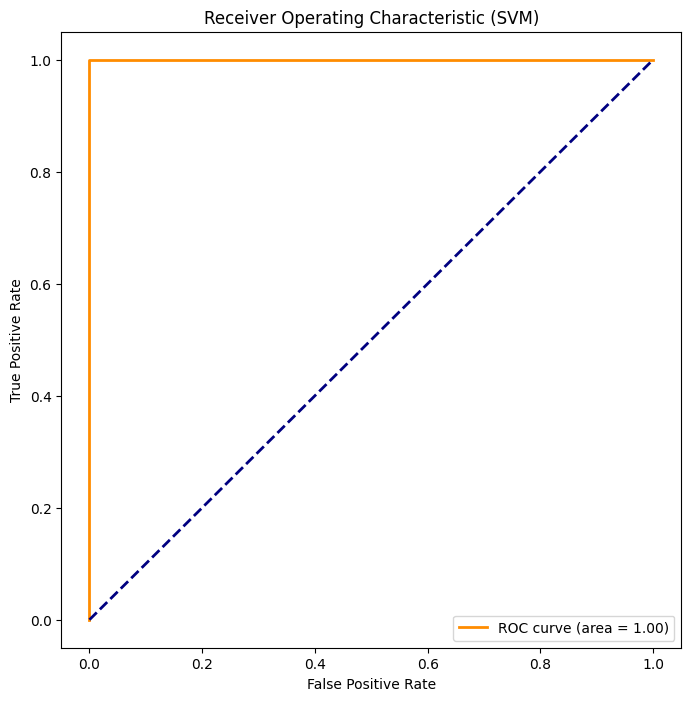

In [33]:
# Visualize the ROC curve for SVM
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, best_svm_classifier.decision_function(x_test))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc='lower right')
plt.show()

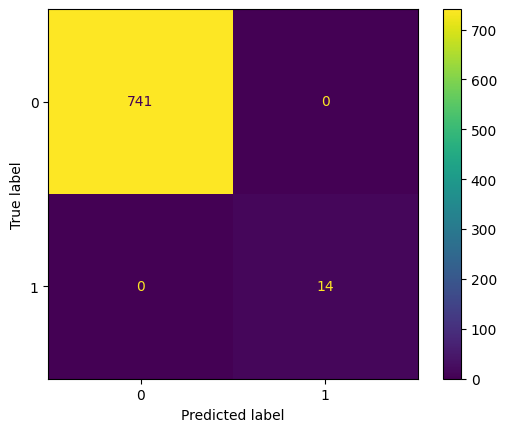

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,ypred_svm)

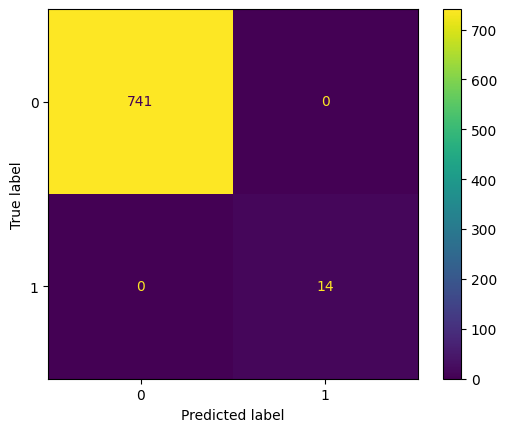

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,ypred_rf)

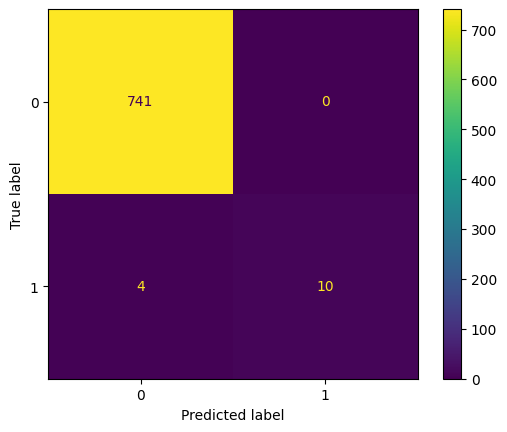

In [22]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,ypred_lr)